<a href="https://colab.research.google.com/github/AntonyBoza/DEEP-LEARNING/blob/master/Transfer_Learning_Exercise_MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## First we need to import TensorFlow and others main packages

In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pylab as plt

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers
import os
import numpy as np
import PIL.Image as Image
from tensorflow.python.util.tf_export import tf_export

In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Use a TensorFlow Hub MobileNet for prediction
### The model that we'll use is MobileNet v2 (but any model from tf2 compatible image classifier URL from tfhub.dev would work).

## Download the classifier
### Download the MobileNet model and create a Keras model from it. MobileNet is expecting images of 224  ×  224 pixels, in 3 color channels (RGB).

In [4]:
CLASSIFIER_URL ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"
IMAGE_RES = 224

model = tf.keras.Sequential([
    hub.KerasLayer(CLASSIFIER_URL, input_shape=(IMAGE_RES, IMAGE_RES, 3))
])

## Run it on a single image

### MobileNet has been trained on the ImageNet dataset. ImageNet has 1000 different output classes, and one of them is dogs and their different breeds. Let's get an image containing a dog that is not part of ImageNet, and see if our model can predict which breed it is.

In [5]:
dataset = tf.keras.utils.get_file(
      fname="Astro2.jpg", 
      origin="https://github.com/AntonyBoza/FILES/raw/master/Astro2.jpg", 
      extract=False)

In [15]:
# save model image file to Google Drive
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
!ls -la /content/gdrive/My\ Drive/Colab\ Notebooks/

total 9599
-rw------- 1 root root   16046 Jul  1 15:04  Astro.jpg
-rw------- 1 root root   48996 Jun 11 15:02 'Babysitting-MNIST Python Neural Network-FINAL-Copy1.ipynb'
-rw------- 1 root root   26494 Jun 23 17:53 'Copia de l05c03_exercise_flowers_with_data_augmentation (1).ipynb'
-rw------- 1 root root   21880 Jun 23 16:21 'Copia de l05c03_exercise_flowers_with_data_augmentation (2).ipynb'
-rw------- 1 root root   26539 Jun 28 17:35 'Copia de l05c03_exercise_flowers_with_data_augmentation.ipynb'
-rw------- 1 root root    7460 Jun 12 19:48 'Copia de UpLift-Project_model to predict salary.ipynb'
-rw------- 1 root root   19008 May 27 20:12  FuzzyMatcher-2.ipynb
-rw------- 1 root root  539469 Jun 30 03:20 'Fuzzy matching.ipynb'
-rw------- 1 root root   31985 Jun 30 20:14 'Geospatial Analysis.ipynb'
drwx------ 2 root root    4096 Jun 30 19:25 'GEOSPATIAL PROJECT'
-rw------- 1 root root  784278 Apr 14 15:28 'Imputing missing values.ipynb'
-rw------- 1 root root   11969 May 23 10:07 'Listado

In [ ]:
# from google.colab import files 
# files.upload()

Saving Astro.jpg to Astro.jpg


{'Astro.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe1\x00"Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x01\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x02\x01\x01\x02\x02\x02\x02\x02\x02\x02\x02\x03\x05\x03\x03\x03\x03\x03\x06\x04\x04\x03\x05\x07\x06\x07\x07\x07\x06\x07\x07\x08\t\x0b\t\x08\x08\n\x08\x07\x07\n\r\n\n\x0b\x0c\x0c\x0c\x0c\x07\t\x0e\x0f\r\x0c\x0e\x0b\x0c\x0c\x0c\xff\xdb\x00C\x01\x02\x02\x02\x03\x03\x03\x06\x03\x03\x06\x0c\x08\x07\x08\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\xff\xc0\x00\x11\x08\x02\x15\x01,\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00

147456/146066 [==============================] - 0s 0us/step


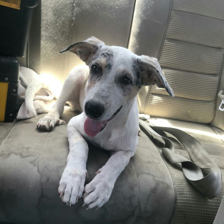

In [7]:
astro = tf.keras.utils.get_file('image2.jpg','https://github.com/AntonyBoza/FILES/raw/master/Astro2.jpg')
astro = Image.open(astro).resize((IMAGE_RES, IMAGE_RES))
astro


In [8]:
print(astro)

<PIL.Image.Image image mode=RGB size=224x224 at 0x7F6F20831EB8>


Remember, models always want a batch of images to process. So here, we add a batch dimension, and pass the image to the model for prediction.

In [9]:
astro = np.array(astro)/255.0
astro.shape

(224, 224, 3)

In [10]:
result = model.predict(astro[np.newaxis, ...])
result.shape

(1, 1001)

The result is a 1001 element vector of logits, rating the probability of each class for the image.

So the top class ID can be found with argmax. But how can we know what class this actually is and in particular if that class ID in the ImageNet dataset denotes a dog or something else?

In [11]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

173

Decode the predictions
To see what our predicted_class is in the ImageNet dataset, download the ImageNet labels and fetch the row that the model predicted.

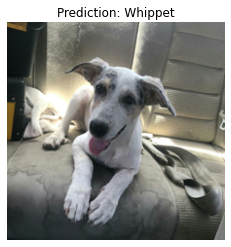

In [12]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

plt.imshow(astro)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())